In [ ]:
# !pip install koreanize_matplotlib

In [33]:
# !pip install wordcloud

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

Text(0.5, 1.0, '한글 테스트')

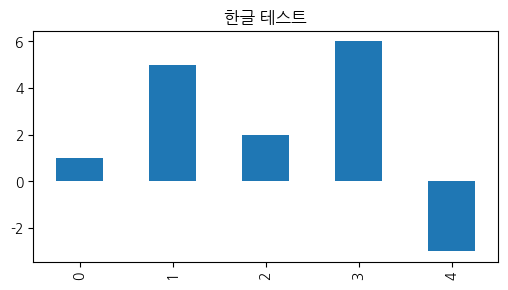

In [11]:
plt.figure(figsize=(6, 3))
pd.Series([1, 5, 2, 6, -3]).plot.bar()
plt.title('한글 테스트')

In [12]:
url = 'https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json'
print(url)
df = pd.read_json(url)
df.shape

https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json


(45678, 7)

In [13]:
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25


In [14]:
# 제목 중복 체크
df.duplicated(subset=['title']).sum()

0

In [15]:
# 결측치 확인
df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45678 entries, 0 to 45677
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   guid                      45678 non-null  object
 1   title                     45678 non-null  object
 2   predefined_news_category  45678 non-null  object
 3   label                     45678 non-null  object
 4   annotations               45678 non-null  object
 5   url                       45678 non-null  object
 6   date                      45678 non-null  object
dtypes: object(7)
memory usage: 2.4+ MB


In [19]:
# 제목 문장의 길이
df['title_len'] = df['title'].str.len()
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date,title_len
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23


In [22]:
# 토큰 갯수
df['title_count'] = df['title'].str.split().str.len()
df.head(2)

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,26,7
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,23,5


In [25]:
df[['title_len', 'title_count']].describe()

,title_len,title_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [27]:
df[df['title_len'] == 4]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
4343,ynat-v1_train_04343,봄 산책,생활문화,생활문화,"{'annotators': ['12', '10', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.05. 오후 1:51,4,2


array([[<Axes: title={'center': 'title_len'}>,
        <Axes: title={'center': 'title_count'}>]], dtype=object)

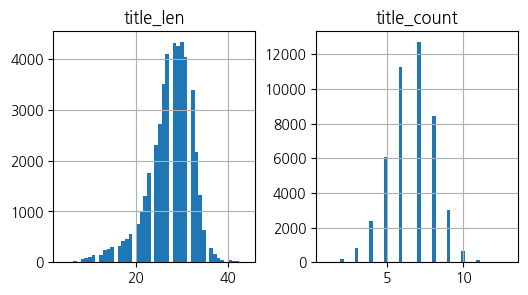

In [29]:
# df[['title_len', 'title_count']].hist(figsize=(6, 3))
df.hist(figsize=(6, 3), bins=50)

In [30]:
# 가장 긴 제목 보기
df[df['title_len'] == df['title_len'].max()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


In [34]:
from wordcloud import WordCloud

In [40]:
font_path = r'c:\windows\Fonts\malgun.ttf'

In [166]:
stopwords = ['첫']

def display_word_cloud(data, /, *, width=1200, height=500, stopwords=[], mask=None):
    wordcloud = WordCloud(font_path=font_path, 
                          width=width,
                          height=height,
                          random_state=2024, 
                          background_color='#fff', 
                          stopwords=stopwords, # 함수의 매개변수로 받아온 stopwords 사용
                          mask=mask
                         ).generate(data)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return wordcloud

In [82]:
# 제목 컬럼을 하나의 문자열로 만들기
df['title']
news_title = ' '.join(df['title'])
news_title[:200]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 내년부터 국가RD 평가 때 논문건수는 반영 않는다 김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 야외서 생방송 하세요…액션캠 전용 요금제 잇따라 월드컵 태극전사 16강 전초기지 레오강 입성종합 미세먼지'

In [69]:
df['title_count'].sum()

301987

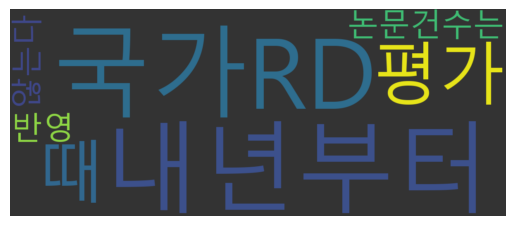

In [66]:
display_word_cloud(df['title'][2])

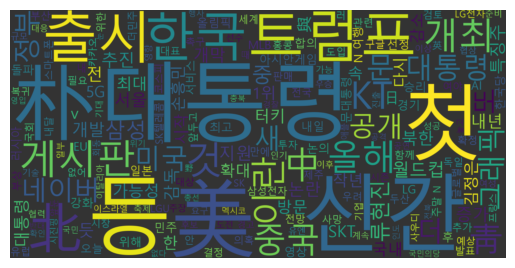

In [71]:
display_word_cloud(news_title, width=2000, height=1000)

In [72]:
df['label'].unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [74]:
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [ ]:
# 정규표현식
# 숫자 제거 [0-9], \d, [^0-9], \D
# 문자만 남기기 [^ㄱ-ㅎ ㅏ-ㅣ 가-힣 a-z A-Z]
# df['title'].str.replace('[0-9]', '', regex=True)

In [83]:
subject_title1 = ' '.join(df.loc[df['label'] == '세계', 'title'])
subject_title1 = df[:200]

In [84]:
subject_title2 = ' '.join(df.loc[df['label'] == '생활문화', 'title'])
subject_title2 = df[:200]

### 형태소 분석기로 특정 품사만 추출하기
[hyunwoongko/pecab: Pecab: Pure python Korean morpheme analyzer based on Mecab](https://github.com/hyunwoongko/pecab)

In [85]:
!pip install pecab

     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
     --------------------------------------- 0.0/26.4 MB 259.2 kB/s eta 0:01:42
     --------------------------------------- 0.1/26.4 MB 465.5 kB/s eta 0:00:57
     --------------------------------------- 0.1/26.4 MB 595.3 kB/s eta 0:00:45
     --------------------------------------- 0.2/26.4 MB 841.6 kB/s eta 0:00:32
     --------------------------------------- 0.3/26.4 MB 983.0 kB/s eta 0:00:27
     ---------------------------------------- 0.3/26.4 MB 1.1 MB/s eta 0:00:25
      --------------------------------------- 0.4/26.4 MB 1.2 MB/s eta 0:00:22
      --------------------------------------- 0.5/26.4 MB 1.3 MB/s eta 0:00:21
      --------------------------------------- 0.6/26.4 MB 1.3 MB/s eta 0:00:20
     - -------------------------------------- 0.7/26.4 MB 1.4 MB/s e

In [88]:
df.loc[df['title_len'] == df['title_len'].max(), 'title']

5792     美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보
20168    그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위
28257    주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비
30493    MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매
Name: title, dtype: object

In [89]:
df.loc[20168, 'title']

'그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위'

In [91]:
from pecab import PeCab

In [92]:
pecab = PeCab()
pecab.nouns(df.loc[20168, 'title'])

['그래픽', '네이처', '세계', '연구', '기관', '년', '평가', '발표', '서울대', '국내', '위', '세계', '위']

In [102]:
# 사회 부분 기사제목 1000건 무작위 추출
df_society = df.loc[df['label'] == '사회'].sample(1000, random_state=2024).copy()
df_society.shape

(1000, 9)

In [107]:
# 시간이 오래 걸리는 작업 시 시각적으로 진행상황을 보여준다
from tqdm import tqdm
tqdm.pandas()

df_society['title_none'] = df_society['title'].progress_map(lambda x : ' '.join(pecab.nouns(x)))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 16.11it/s]


In [109]:
# df_society[['title1', 'title2', 'title3', 'title', 'title_none']]

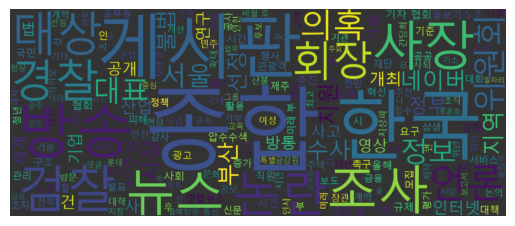

In [151]:
stopwords = ['명', '일', '년', '만', '위', '등', '천', '중', '개', '전', '원', '억', '대']
wordcloud_society = display_word_cloud(' '.join(df_society['title_none']), stopwords=stopwords)

In [138]:
dir(wordcloud_society)

['__array__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_generated',
 '_draw_contour',
 '_get_bolean_mask',
 'background_color',
 'collocation_threshold',
 'collocations',
 'color_func',
 'colormap',
 'contour_color',
 'contour_width',
 'fit_words',
 'font_path',
 'font_step',
 'generate',
 'generate_from_frequencies',
 'generate_from_text',
 'height',
 'include_numbers',
 'layout_',
 'margin',
 'mask',
 'max_font_size',
 'max_words',
 'min_font_size',
 'min_word_length',
 'mode',
 'normalize_plurals',
 'prefer_horizontal',
 'process_text',
 'random_state',
 'recolor',
 'regexp',
 'relative_scaling',
 'repeat',
 'scale',
 'stopwords',
 'to

In [152]:
wordcloud_society.words_

{'종합': 1.0,
 '한국': 0.64,
 '게시판': 0.56,
 '방송': 0.38666666666666666,
 '사장': 0.30666666666666664,
 '조사': 0.29333333333333333,
 '검찰': 0.28,
 '뉴스': 0.28,
 '논란': 0.26666666666666666,
 '대상': 0.26666666666666666,
 '경찰': 0.25333333333333335,
 '회장': 0.25333333333333335,
 '언론': 0.22666666666666666,
 '의혹': 0.22666666666666666,
 '위원회': 0.22666666666666666,
 '대표': 0.22666666666666666,
 '정보': 0.22666666666666666,
 '서울': 0.22666666666666666,
 '네이버': 0.2,
 '수사': 0.2,
 '부산': 0.2,
 '지역': 0.2,
 '선정': 0.18666666666666668,
 '시장': 0.18666666666666668,
 '지원': 0.18666666666666668,
 '불법': 0.18666666666666668,
 '정부': 0.18666666666666668,
 '인터넷': 0.18666666666666668,
 '개최': 0.18666666666666668,
 '산업': 0.18666666666666668,
 '방통': 0.17333333333333334,
 '법': 0.17333333333333334,
 '사': 0.16,
 '사고': 0.16,
 '영상': 0.16,
 '공개': 0.16,
 '주년': 0.16,
 '세계': 0.16,
 '연구': 0.16,
 '기업': 0.16,
 '가능': 0.16,
 '건': 0.16,
 '기자 협회': 0.16,
 '규제': 0.14666666666666667,
 '강화': 0.14666666666666667,
 '협회': 0.14666666666666667,
 '사건': 0.1466

<Axes: >

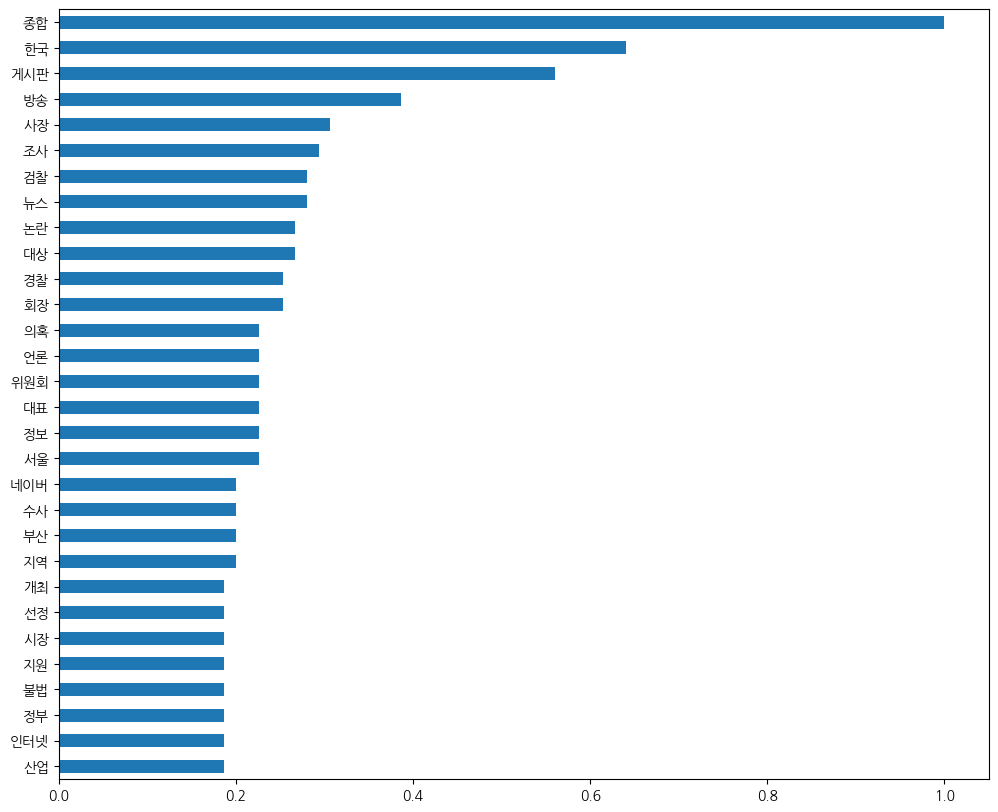

In [153]:
plt.figure(figsize=(12, 10))
wordcloud_society_s = pd.Series(wordcloud_society.words_)
wordcloud_society_s.nlargest(30).sort_values(ascending=True).plot.barh()

In [168]:
import requests
from PIL import Image

# mask_img_path = 'https://cdn.pixabay.com/photo/2016/04/01/08/48/architecture-1298980_1280.png'
mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

# 이미지 다운로드
response = requests.get(mask_img_path)

# http 요청이 성공적으로 수행되었으면 이미지를 로컬에 저장
if response.status_code == 200 :
    with open('alice_mask.png', 'wb') as file :
        file.write(response.content)
        
mask_img = np.array(Image.open('alice_mask.png'))

In [169]:
print(mask_img_path)

https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png


In [170]:
mask_img.shape

(900, 900)

In [171]:
def display_word_cloud_2(data, /, *, width=1200, height=500, stopwords=[], mask=None):
    wordcloud = WordCloud(font_path=font_path, 
                          width=width,
                          height=height,
                          random_state=2024, 
                          background_color='#fff', 
                          stopwords=stopwords, # 함수의 매개변수로 받아온 stopwords 사용
                          mask=mask
                         ).generate(data)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return wordcloud

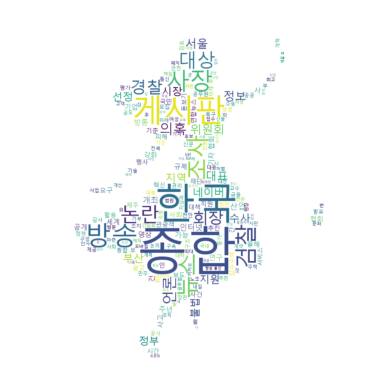

In [172]:
stopwords = ['명', '일', '년', '만', '위', '등', '천', '중', '개', '전', '원', '억', '대']
wordcloud_society = display_word_cloud(' '.join(df_society['title_none']), stopwords=stopwords, mask=mask_img)